## Proj_02 : Identify Customer Segments
- Source : UdaCity, Machine Learning Intro, Unsupervided Learning

## Introduction

In this project, you will apply unsupervised learning techniques to ****identify segments of the population that form the core customer base**** for a mail-order sales company in Germany.<br>
These segments can then be used to direct marketing campaings audiences that will have the highest expected rate of returns.<br>
The data that you will use has been provided by our partners at `Bertelsmann Arvato Analytics`, and represents a real-life data science task.

## Goal

****Each row**** of the demographics files represents ****a single person**** , but also includes information outside of individuals, including information about their household, building, and neighborhood. <br>

I will use this information to ****cluster the general population into groups**** with similar demographic properties. 
Then, I will see how the people in the customers dataset fit into those created clusters.<br> 

The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.


<a id="mokuji_0"></a>
## Contents
1. [Exploring the Dataset](#mokuji_1)<br>
  1-1. [Data_Dictionary.md](#mokuji_1_1)<br>
  1-2. [AZDIAS_Feature_Summary.csv](#mokuji_1_2)<br>
  1-3. [UdaCity_AZDIAS_Subset.csv](#mokuji_1_3)<br>
  1-4. [Udacity_CUSTOMERS_Subset.csv](#mokuji_1_4)<br>
  <br>
2. [Preprocessing the Dataset](#mokuji_2)<br>
  2-1. [Convert Missing or Unknown Values to NANs](#mokuji_2_1)<br>
  2-2. [Discussions about Nan in Each Column](#mokuji_2_2)<br>
  2-3. [Discussions about Nan in Each Row](#mokuji_2_3)<br>
  2-4. [Discussions about Data Types](#mokuji_2_4)<br>
  2-5. [Encoding](#mokuji_2_5)<br>
      2-5-1. [Encoding : `categorical`](#mokuji_2_5_1)<br>
      2-5-2. [Encoding : `mixed`](#mokuji_2_5_2)<br>
  2-6. [Scaling](#mokuji_2_6)<br>
  <br>
3. [Dimensionality Reduction](#mokuji_3)<br>
  3-1. [PCA, First Trial](#mokuji_3_1)<br>
  3-2. [Check Out the PCA Results](#mokuji_3_2)<br>
  3-3. [PCA, Re-Fit](#mokuji_3_3)<br>
  
  
  https://ksatola.github.io/projects/Identify_Customer_Segments10new_final.html

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

# show all observation-related columns/rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

<a id="mokuji_1"></a>
## [1. Exploring the Dataset](#mokuji_0)

There are four files in the directory "./Data/Proj_02"

1. Data_Dictionary.md
    - This file includes detail explanation of all features.
    - From this file, I found that main dataset of this project are `UdaCity_AZDIAS_Subset.csv` and `UdaCity_CUSTOMERS_Subset.csv`.
2. AZDIAS_Features_Summary.csv
    - Summary of feature attributes for demographics data. 
    - 85 features(rows) x 4 columns.
3. UdaCity_AZDIAS_Subset.csv
    - Demographics data for the general population of Germany.
    - 891211 persons(rows) x 85 features(columns).
4. UdaCity_CUSTOMERS_Subset.csv
    - Demographics data for customers of a mail-order company.
    - 191652 persons (rows) x 85 features (columns).

The fiture below is the relationship of data.
<img src="./Data/Proj_02/ER_01.PNG" width="450"/>

I will explore these dataset.



<a id="mokuji_1_1"></a>
### [1-1. Data_Dictionary.md](#mokuji_0)

Detailed information file about the features in the provided datasets.<br>
In `Data_Disctionary.md`, there are explanations for data.<br>
I show the contents example in the cell below.

In [3]:
# Import my libarary
from Library.my_common_tool import display_text_file
display_text_file("./Data/Proj_02/Data_Dictionary.md", line_start=33, line_end=51)

## 1. Person-level feature

### 1.1. AGER_TY
Best-ager typolog
- -1: unknow
-  0: no classification possibl
-  1: passive elderl
-  2: cultural elderl
-  3: experience-driven elderl

### 1.2. ALTERSKATEGORIE_GRO
Estimated age based on given name analysi
- -1: unknown (missing
-  0: unknown (cannot be determined
-  1: < 30 years ol
-  2: 30 - 45 years ol
-  3: 46 - 60 years ol
-  4: > 60 years ol
-  9: uniformly distribute


To get the relationship about `attribute` and `explanation` of `Data_Disctionary.md`, I convert `Data_Disctionary.md` into `Data_Disctionary.csv` and create the variable `my_dict`.

In [4]:
# Import my libarary
from Library.Proj_02.my_data_process import convert_dict_md_to_csv
#
# Convert .md to .csv
file_path_dict = "./Data/Proj_02/Data_Dictionary.md"
convert_dict_md_to_csv("./Data/Proj_02/Data_Dictionary.md")
#
my_dict = pd.read_csv("./Data/Proj_02/Data_Dictionary.csv", sep="\t")
display("my_dict size is {}".format(my_dict.shape))
display(my_dict.head(10))

'my_dict size is (85, 5)'

,id_1,id_2,id_3,attribute,explanation
0,1,1,101,AGER_TYP,Best-ager typology
1,1,2,102,ALTERSKATEGORIE_GROB,Estimated age based on given name analysis
2,1,3,103,ANREDE_KZ,Gender
3,1,4,104,CJT_GESAMTTYP,Customer-Journey-Typology: preferred informati...
4,1,5,105,FINANZ_MINIMALIST,"Financial typology, for each dimension:"
5,1,5,105,FINANZ_SPARER,"Financial typology, for each dimension:"
6,1,5,105,FINANZ_VORSORGER,"Financial typology, for each dimension:"
7,1,5,105,FINANZ_ANLEGER,"Financial typology, for each dimension:"
8,1,5,105,FINANZ_UNAUFFAELLIGER,"Financial typology, for each dimension:"
9,1,5,105,FINANZ_HAUSBAUER,"Financial typology, for each dimension:"


<a id="mokuji_1_2"></a>
### [1-2. AZDIAS_Feature_Summary.csv](#mokuji_0)

Summary of feature attributes for demographics data.

In [5]:
feat_info = pd.read_csv("./Data/Proj_02/AZDIAS_Feature_Summary.csv", sep=";")
display(feat_info.shape)
display(feat_info.head(10))

(85, 4)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [6]:
# Count Nans
print("Number of Nans")
print("--------------------------")
feat_info.isnull().sum(axis=0)

Number of Nans
--------------------------


attribute             0
information_level     0
type                  0
missing_or_unknown    0
dtype: int64

In [7]:
# Import my library
from Library.my_common_tool import display_unique_values
#
print("Unique Values")
col_names_of_string_value = ["attribute", "information_level", "type", "missing_or_unknown"]
display_unique_values(feat_info, col_names_of_string_value)

Unique Values
--------------------------
0. [attribute] : unique value num = 85
AGER_TYP, ALTERSKATEGORIE_GROB, ANREDE_KZ, CJT_GESAMTTYP, FINANZ_MINIMALIST, FINANZ_SPARER, FINANZ_VORSORGER, FINANZ_ANLEGER, FINANZ_UNAUFFAELLIGER, FINANZ_HAUSBAUER, FINANZTYP, GEBURTSJAHR, GFK_URLAUBERTYP, GREEN_AVANTGARDE, HEALTH_TYP, LP_LEBENSPHASE_FEIN, LP_LEBENSPHASE_GROB, LP_FAMILIE_FEIN, LP_FAMILIE_GROB, LP_STATUS_FEIN, LP_STATUS_GROB, NATIONALITAET_KZ, PRAEGENDE_JUGENDJAHRE, RETOURTYP_BK_S, SEMIO_SOZ, SEMIO_FAM, SEMIO_REL, SEMIO_MAT, SEMIO_VERT, SEMIO_LUST, SEMIO_ERL, SEMIO_KULT, SEMIO_RAT, SEMIO_KRIT, SEMIO_DOM, SEMIO_KAEM, SEMIO_PFLICHT, SEMIO_TRADV, SHOPPER_TYP, SOHO_KZ, TITEL_KZ, VERS_TYP, ZABEOTYP, ALTER_HH, ANZ_PERSONEN, ANZ_TITEL, HH_EINKOMMEN_SCORE, KK_KUNDENTYP, W_KEIT_KIND_HH, WOHNDAUER_2008, ANZ_HAUSHALTE_AKTIV, ANZ_HH_TITEL, GEBAEUDETYP, KONSUMNAEHE, MIN_GEBAEUDEJAHR, OST_WEST_KZ, WOHNLAGE, CAMEO_DEUG_2015, CAMEO_DEU_2015, CAMEO_INTL_2015, KBA05_ANTG1, KBA05_ANTG2, KBA05_ANTG3, KBA05_AN

<a id="mokuji_1_3"></a>
### [1-3. UdaCity_AZDIAS_Subset.csv](#mokuji_0)

Demographics data for the general population of Germany.

In [8]:
azdias = pd.read_csv("./Data/Proj_02/Udacity_AZDIAS_Subset.csv", sep=";")
display(azdias.shape)
display(azdias.head(10))

(891221, 85)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,2,1943,1.0,0,3,8.0,2.0,1.0,1.0,4.0,2.0,1,3,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0,0.0,0.0,2,4,10.0,1.0,0.0,5.0,3.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,W,7.0,8,8C,54,2.0,2.0,0.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,4,0,12.0,0,2,2.0,1.0,1.0,1.0,2.0,1.0,1,10,4.0,2,5,5,7,2,6,5,5,7,7,4,7,7,7,1,0.0,0.0,1,4,0.0,1.0,0.0,6.0,NaN,3.0,9.0,4.0,0.0,1.0,5.0,1992.0,W,5.0,4,4A,22,3.0,2.0,0.0,0.0,1.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,5,1964,9.0,0,1,5.0,2.0,1.0,1.0,1.0,1.0,1,8,5.0,7,7,7,5,6,2,2,7,5,1,1,2,5,5,0,0.0,0.0,1,1,14.0,1.0,0.0,4.0,NaN,5.0,9.0,6.0,0.0,8.0,3.0,1992.0,W,1.0,2,2D,14,2.0,2.0,0.0,0.0,0.0,4.0,2.0,5.0,3.0,4.0,1.0,4.0,1.0,1.0,758.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,6,1974,3.0,1,3,10.0,3.0,1.0,1.0,10.0,5.0,1,11,4.0,4,5,4,1,5,6,4,5,2,5,5,3,1,4,3,0.0,0.0,2,6,16.0,1.0,0.0,3.0,NaN,5.0,8.0,2.0,1.0,3.0,4.0,1992.0,W,1.0,1,1A,13,1.0,1.0,0.0,0.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,3.0,2.0,3.0,511.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,1,1975,12.0,1,2,4.0,1.0,1.0,1.0,3.0,2.0,1,15,4.0,2,1,1,3,2,6,6,3,4,7,6,7,1,3,3,0.0,0.0,2,4,17.0,1.0,0.0,4.0,6.0,4.0,3.0,9.0,0.0,3.0,4.0,1992.0,W,7.0,1,1E,15,1.0,3.0,1.0,0.0,0.0,2.0,6.0,5.0,4.0,3.0,1.0,3.0,3.0,1.0,530.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


I seek how may Nan is there in each `column` of `azdias`.

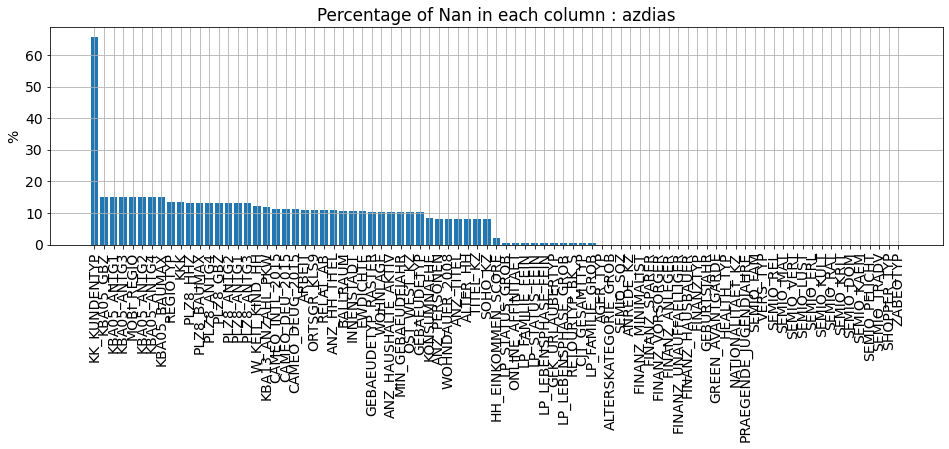

In [9]:
# Count Nans
from Library.my_common_tool import plot_nan_ratio_each_column, plot_nan_ratio_each_row
title = "Percentage of Nan in each column : azdias"
plot_nan_ratio_each_column(azdias, title,figsize=(16,4),fontsize=14,bRemoveZeroNanData=False);

In the cell below, there are some data which have big value.<br>
So, I think that normalization will be needed.

(0.0, 100.0)

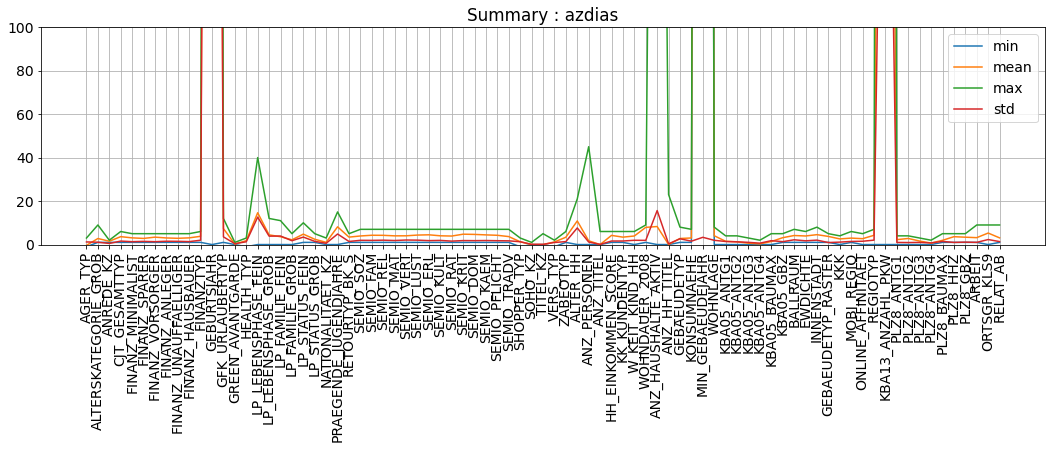

In [10]:
# Import my library
from Library.my_common_tool import plot_summary

# Show Data Summary
title = "Summary : azdias"
fig = plot_summary(azdias, title,figsize=(18,4),fontsize=14)
plt.figure(fig)
plt.ylim((0,100))

<a id="mokuji_1_4"></a>
### [1-4. Udacity_CUSTOMERS_Subset.csv](#mokuji_0)

Demographics data for customers of a mail-order company.

In [11]:
customers = pd.read_csv("./Data/Proj_02/Udacity_CUSTOMERS_Subset.csv", sep=";")
display(customers.shape)
display(customers.head(5))

(191652, 85)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,2,0,4.0,1,1,20.0,5.0,2.0,2.0,10.0,5.0,1,4,5.0,6,5,2,6,6,7,3,4,1,3,1,1,2,1,3,0.0,0.0,1,3,10.0,2.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,1.0,5.0,1992.0,W,7.0,1,1A,13,2.0,2.0,0.0,0.0,0.0,4.0,3.0,2.0,4.0,4.0,1.0,4.0,3.0,1.0,1201.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,2,0,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,3,6,2,6,7,5,3,4,1,3,3,2,4,1,3,0.0,0.0,1,3,11.0,3.0,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,2,0,3.0,1,2,13.0,3.0,1.0,1.0,10.0,5.0,1,4,5.0,2,2,1,3,3,7,7,1,2,7,5,6,4,1,1,0.0,0.0,2,3,6.0,1.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,8.0,1.0,1992.0,W,2.0,5,5D,34,2.0,2.0,0.0,0.0,0.0,3.0,7.0,4.0,1.0,3.0,3.0,3.0,1.0,7.0,433.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,6,0,10.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,1,3.0,6,5,3,4,7,5,3,4,3,3,3,3,3,4,0,0.0,0.0,1,1,8.0,0.0,0.0,4.0,NaN,NaN,9.0,0.0,NaN,2.0,2.0,1992.0,W,7.0,4,4C,24,3.0,0.0,0.0,0.0,1.0,4.0,7.0,1.0,7.0,4.0,3.0,4.0,2.0,6.0,755.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,2,1960,2.0,0,3,31.0,10.0,10.0,5.0,1.0,1.0,1,8,5.0,4,5,4,6,5,6,4,5,5,3,5,2,5,4,1,0.0,0.0,2,1,20.0,4.0,0.0,6.0,2.0,2.0,9.0,7.0,0.0,3.0,1.0,1992.0,W,3.0,7,7B,41,0.0,3.0,2.0,0.0,0.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,5.0,7.0,513.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


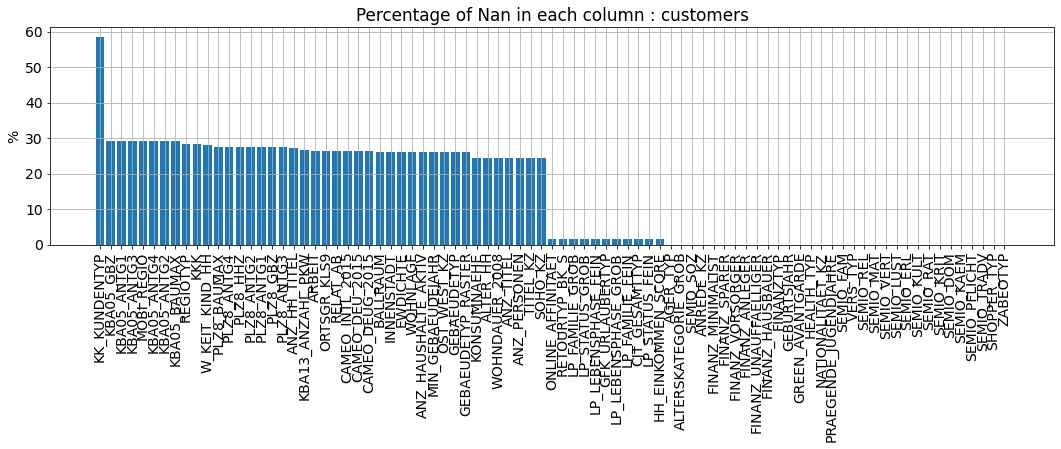

In [12]:
# Count Nans
title = "Percentage of Nan in each column : customers"
plot_nan_ratio_each_column(customers, title,figsize=(18,4),fontsize=14,bRemoveZeroNanData=False);

(0.0, 100.0)

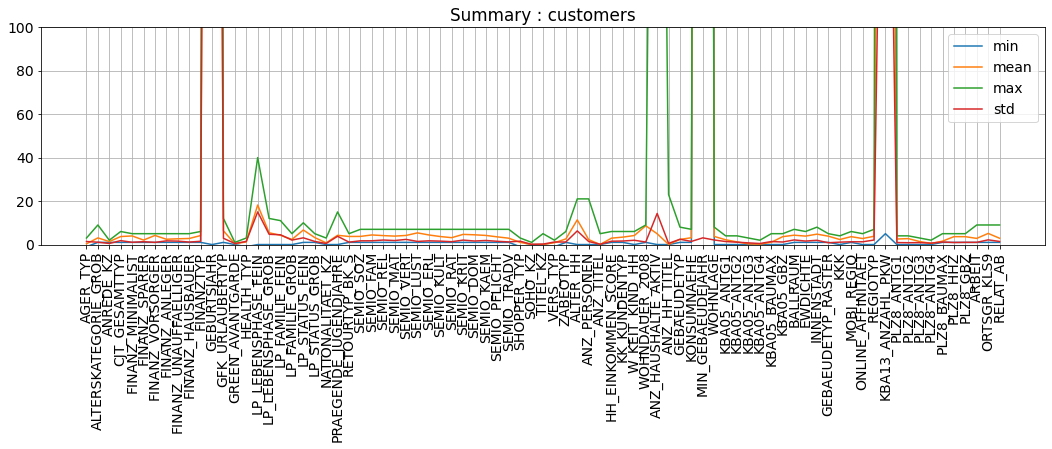

In [13]:
# Show Data Summary
title = "Summary : customers"
fig = plot_summary(customers, title,figsize=(18,4),fontsize=14)
plt.figure(fig)
plt.ylim((0,100))

<a id="mokuji_2"></a>
## [2. Preprocessing the Dataset](#mokuji_0)

In this section, I will process following below:
1. Convert Missing or Unknown Values to NANs
    - `missing_or_unknow` of `feat_info` are used as a flag to find data which have no meaning.
    - `azdias` will be modified according to the flag(`missing_or_unknow`).
2. Assess Nan in Each Column
    - I want to know how to treat nan. So, I visualize the percentage of nan.
    - I will show features which do not have nan.
    - I will drop features which have too much nan.
3. Encoding non-numecial data
    - Features of `azdias` whose `type` are `categorical` or `mixed` are non-numerical. So, I preprocess them with one-hot encoding.

<a id="mokuji_2_1"></a>
### [2-1. Convert Missing or Unknown Values to NANs](#mokuji_0)

From the cell above, unique values of `missing_or_unkown` of `feat_info` are <br>
[-1,0], [-1,0,9], [0], [-1], [], [-1,9], [-1,X], [XX], [-1,XX].<br>
The types of these alues are string. So, I will process `azdias` folloing below:
1. I get a integer `value A` from strings (`[-1,0], [-1,0,9], [0], [-1], [], [-1,9], [-1,X], [XX], [-1,XX]`)
2. `value A` is `missing` or `unknow`, so `value A` has no meaning. I will replace `value A` in `azdias` of `np.nan`.

In the next cell, I implement the function to convert.

In [14]:
def conv_miss_to_nan(feat_info, df):
    for id_feat in range(feat_info.shape[0]):
        feature_name = feat_info["attribute"][id_feat]
        miss_string  = feat_info["missing_or_unknown"][id_feat]
        
        #print("feature_name ={} / miss_str = {}".format(feature_name,miss_string))
        
        # replace unnecessary string
        miss_string = miss_string.replace("[", "")
        miss_string = miss_string.replace("]", "")
        miss_string = miss_string.replace(" ", "")
        
        # split string
        miss_string_list = miss_string.split(",")
        
        # replace "miss value" to "np.nan"
        for tmp_str in miss_string_list:
            if(tmp_str == "X") or (tmp_str == "XX"):
                df[feature_name] = df[feature_name].replace(tmp_str, np.nan)
                #print("{} / Find X or XX : {}".format(feature_name, tmp_str))
            elif (len(tmp_str)==0):
                df[feature_name] = df[feature_name].replace(tmp_value, np.nan)
                #print("{} / Find Empty".format(feature_name))
            else:
                tmp_value = int(tmp_str)
                df[feature_name] = df[feature_name].replace(tmp_value, np.nan)
                #print("{} / Find {}".format(feature_name,tmp_value))
    #
    return df

In [15]:
def display_unique_values(df):
    for column_name in df.columns:
        print("{} : {}".format(column_name, df[column_name].unique()))

In [16]:
print("Number of NAN : Before converting missing to nan")
azdias.isnull().sum(axis=0).sum()

Number of NAN : Before converting missing to nan


4896838

In [17]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [18]:
# Conver missing to nan
azdias = conv_miss_to_nan(feat_info, azdias)

print("Number of NAN : After converting missing to nan")
azdias.isnull().sum(axis=0).sum()

Number of NAN : After converting missing to nan


10774592

In [19]:
display_unique_values(azdias)

AGER_TYP : [nan  2.  3.  1.]
ALTERSKATEGORIE_GROB : [ 2.  1.  3.  4. nan]
ANREDE_KZ : [1 2]
CJT_GESAMTTYP : [ 2.  5.  3.  4.  1.  6. nan]
FINANZ_MINIMALIST : [3 1 4 2 5]
FINANZ_SPARER : [4 5 2 3 1]
FINANZ_VORSORGER : [3 2 1 5 4]
FINANZ_ANLEGER : [5 2 1 4 3]
FINANZ_UNAUFFAELLIGER : [5 4 3 1 2]
FINANZ_HAUSBAUER : [3 5 2 4 1]
FINANZTYP : [4 1 6 5 2 3]
GEBURTSJAHR : [  nan 1996. 1979. 1957. 1963. 1943. 1964. 1974. 1975. 1941. 1993. 1946.
 1988. 1991. 1966. 1949. 1982. 1972. 1990. 1985. 1989. 1948. 1935. 1997.
 1994. 1987. 2002. 1950. 1965. 1969. 1978. 1958. 1944. 1967. 1977. 1960.
 1970. 1973. 1971. 1937. 1947. 1926. 1954. 1981. 1962. 1992. 2008. 1976.
 1928. 1927. 1968. 1940. 1952. 1961. 2006. 1938. 1945. 1942. 1984. 1930.
 1980. 1959. 1986. 1931. 1955. 1983. 2010. 1951. 1921. 1929. 1939. 2001.
 1995. 1956. 1953. 2012. 1934. 1913. 1914. 1922. 2004. 1936. 2009. 1915.
 2003. 2013. 1998. 2007. 1932. 2005. 1923. 1925. 2015. 1933. 2017. 2000.
 1999. 2014. 1920. 1918. 1924. 2016. 2011. 1908. 19

<a id="mokuji_2_2"></a>
### [2-2. Discussions about Nan in Each Column](#mokuji_0)

I will visualize how may Nan is there in each `column` of `azdias`.
From the graph below, I see that 
  - From Fig-2-1
    - Top 6 features(`TITEL_KZ`, `AGER_TYP`, `KK_KUNDENTYP`, `KBA05_BAUMAX`, `GEBURTSJAHR`,`ALTER_HH`) have large percentage of nan. Other data have only less than 20% of nan.
    - I will drop 6 features.
  - From Fig-2-2
    - Features which have no nan are belonged to the `information_level` **person**.

Fig-2-1.


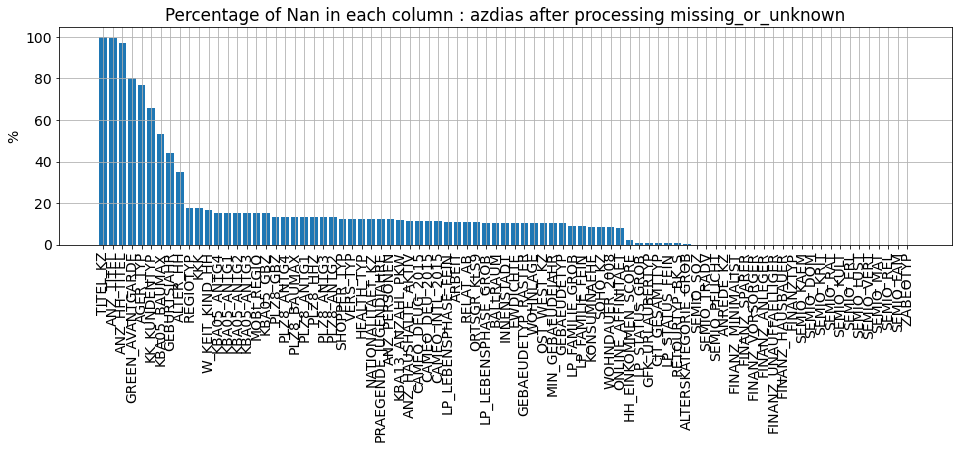

In [20]:
print("Fig-2-1.")
title = "Percentage of Nan in each column : azdias after processing missing_or_unknown"
fig, ser_nan_count_azdias = plot_nan_ratio_each_column(azdias, title,figsize=(16,4),fontsize=14,bRemoveZeroNanData=False);

In [21]:
print("Fig-2-2.")
ser_nan_count_azdias.rename("percent_of_nan")
df_nan_count_azdias = pd.DataFrame(ser_nan_count_azdias, columns=["percent_of_nan"])
df_nan_count_azdias["attribute"] = df_nan_count_azdias.index
feat_info2 = pd.merge(feat_info, df_nan_count_azdias, on="attribute", how="left")
feat_info2.sort_values(by=["percent_of_nan"], ascending=False, inplace=True)
display(feat_info2)

Fig-2-2.


,attribute,information_level,type,missing_or_unknown,percent_of_nan
40,TITEL_KZ,person,categorical,"[-1,0]",99.757636
45,ANZ_TITEL,household,numeric,[],99.643186
51,ANZ_HH_TITEL,building,numeric,[],97.310544
13,GREEN_AVANTGARDE,person,categorical,[],80.338771
0,AGER_TYP,person,categorical,"[-1,0]",76.955435
47,KK_KUNDENTYP,household,categorical,[-1],65.596749
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]",53.468668
11,GEBURTSJAHR,person,numeric,[0],44.020282
43,ALTER_HH,household,interval,[0],34.813699
73,REGIOTYP,region_rr1,ordinal,"[-1,0]",17.735668


I drop 6 features which have large ratio of nan.

In [22]:
def remove_cols_with_nan(df, thresh_percentage):
    # get the percentage of nan
    ser_num_of_nan = df.isnull().sum(axis=0)
    ser_num_of_nan = ser_num_of_nan / df.shape[0] * 100
    # 
    col_names_wo_nan = ser_num_of_nan[ser_num_of_nan <= thresh_percentage].index
    col_names_w_nan  = ser_num_of_nan[ser_num_of_nan >  thresh_percentage].index
    #
    df_wo_nan = df[col_names_wo_nan]
    df_w_nan  = df[col_names_w_nan]
    #
    return df_wo_nan, df_w_nan

azdias_droped, _  = remove_cols_with_nan(azdias, thresh_percentage=20.0)

<a id="mokuji_2_3"></a>
### [2-3. Discussions about Nan in Each Row](#mokuji_0)

Now I will perform a similar assessment for the rows of the dataset. <br>
How much data is missing in each row?

First I overview of percentage of Nan in each row.<br>
From the graph below, about **70%** of rows have no Nan.

Fig-2-4.


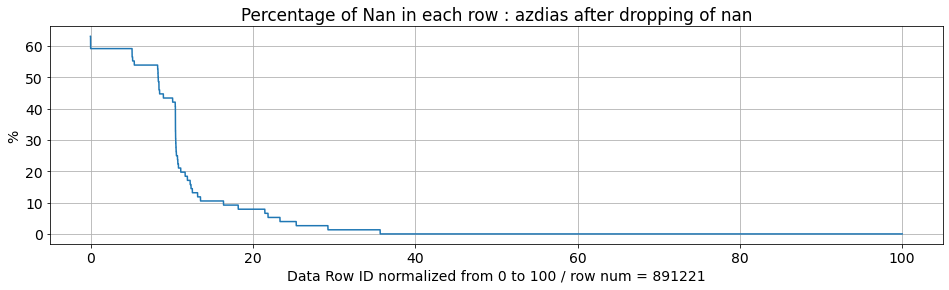

In [23]:
print("Fig-2-4.")
title = "Percentage of Nan in each row : azdias after dropping of nan"
res, ser_nan_count_azdias_each_row = plot_nan_ratio_each_row(azdias_droped, title,figsize=(16,4),fontsize=14,bRemoveZeroNanData=False);

If the distributions of non-missing features look similar between the data with missing values, I could argue that simply dropping those points from the analysis won't present a major issue.

On the other hand, if the data with missing values looks very different from the data with non-missing values, then I should make a note on those data as special.

So I separate `azdias` to two dataset.
  - `azdias_wo_nan` : This dataset has no nan.
  - `azdias_w_nan`  : This dataset has nan.

In [24]:
def remove_rows_with_nan(df, thresh_percentage):
    # get the percentage of nan
    ser_num_of_nan = df.isnull().sum(axis=1)
    ser_num_of_nan = ser_num_of_nan / df.shape[1] * 100
    # 
    row_ids_wo_nan = ser_num_of_nan[ser_num_of_nan <= thresh_percentage].index
    row_ids_w_nan  = ser_num_of_nan[ser_num_of_nan >  thresh_percentage].index
    #
    df_wo_nan = df.iloc[row_ids_wo_nan, :]
    df_w_nan  = df.iloc[row_ids_w_nan,  :]
    #
    return df_wo_nan, df_w_nan


azdias_wo_nan, azdias_w_nan = remove_rows_with_nan(azdias_droped, thresh_percentage=0.0)

#row_ids_wo_nan = ser_nan_count_azdias_each_row[ser_nan_count_azdias_each_row == 0.0].index
#row_ids_w_nan  = ser_nan_count_azdias_each_row[ser_nan_count_azdias_each_row > 0.0].index
#row_ids_wo_nan = row_ids_wo_nan.sort_values()
#row_ids_w_nan  = row_ids_w_nan.sort_values()
#azdias_wo_nan = azdias_droped.iloc[row_ids_wo_nan, :]
#azdias_w_nan  = azdias_droped.iloc[row_ids_w_nan, :]

I will display the comparison graphs of `azdias_wo_nan` and `azdias_w_nan`. <br>
From the graphs below, almost distribution look similar.<br>
So, I think I can remove rows with nan.

D:\app\anaconda3\envs\UdaCity_3_7_13\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


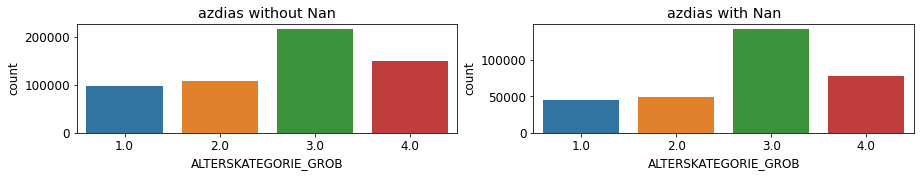

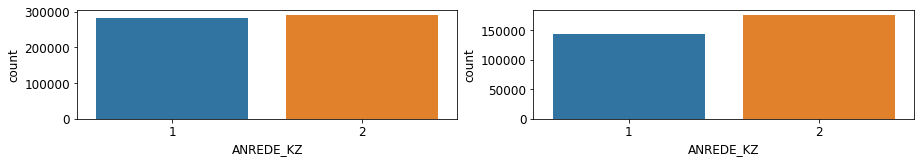

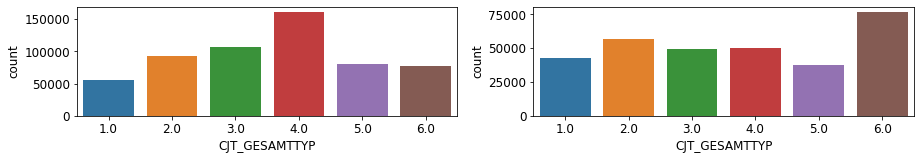

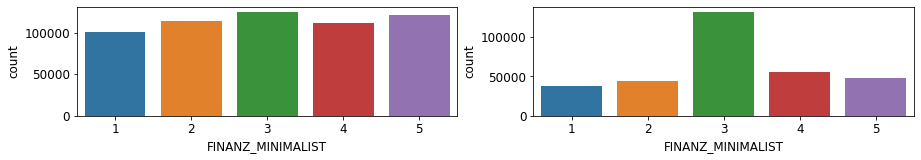

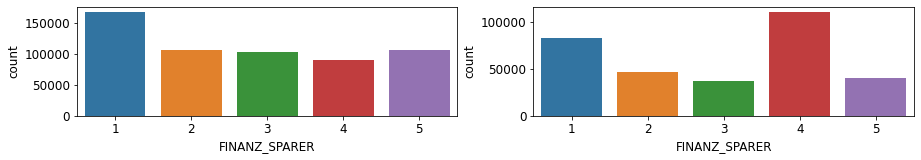

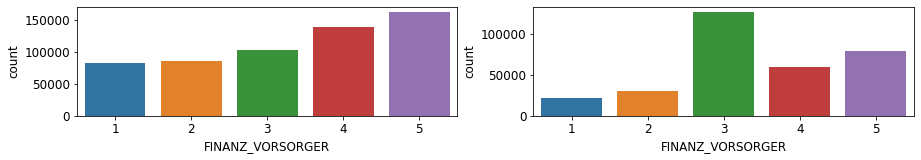

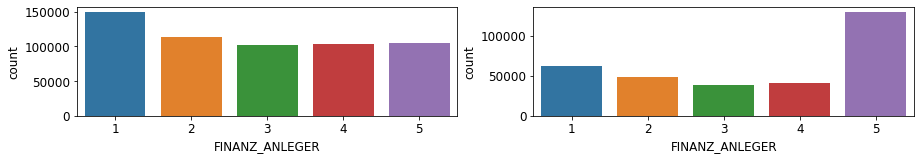

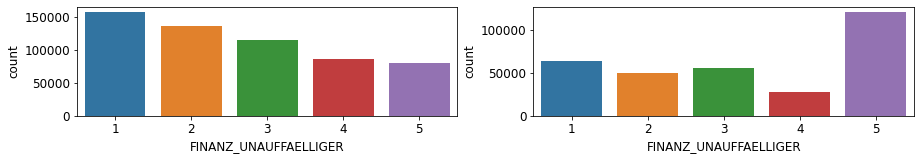

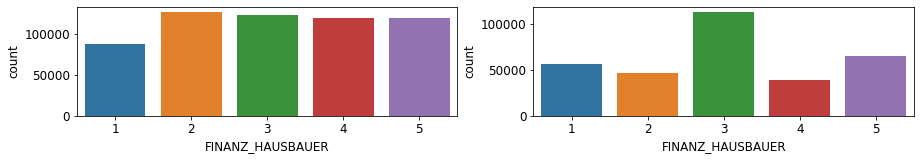

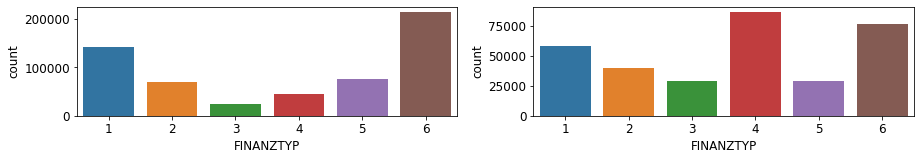

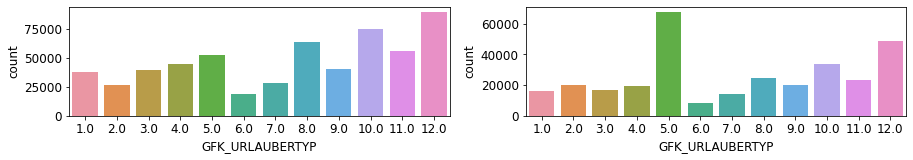

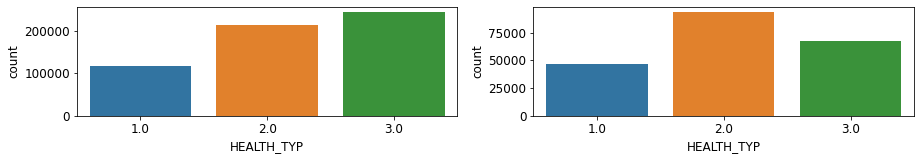

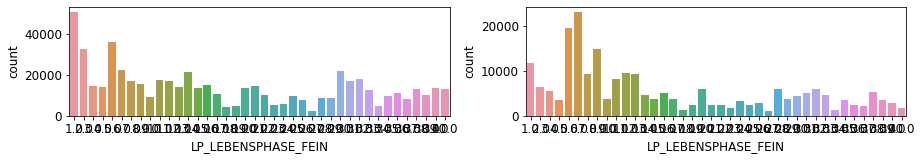

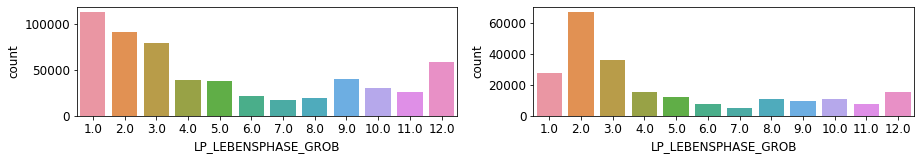

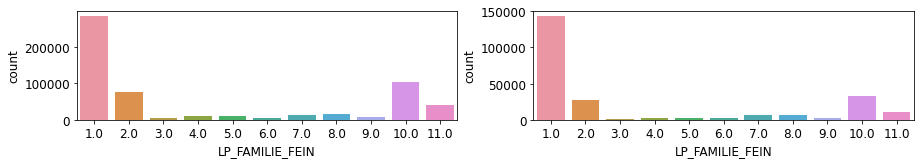

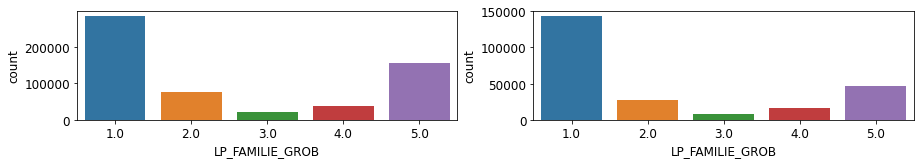

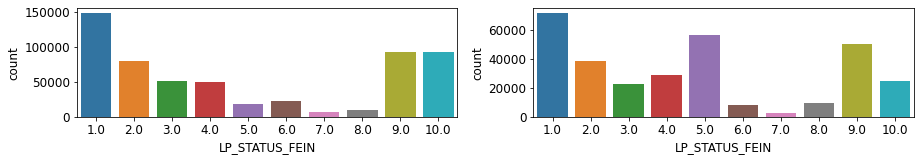

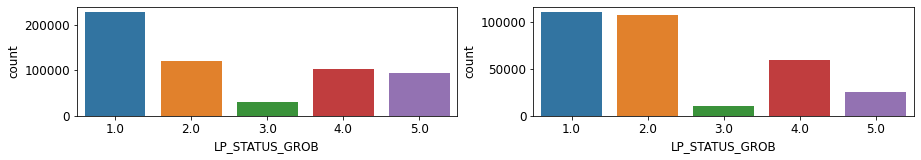

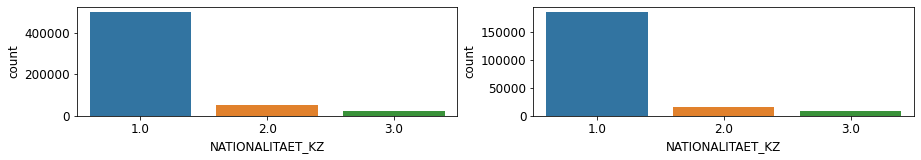

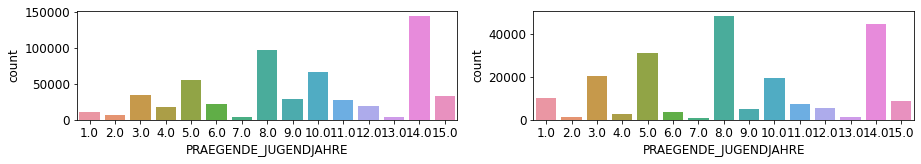

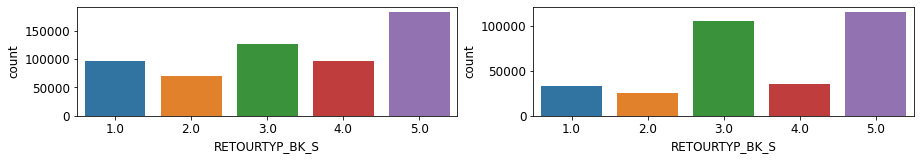

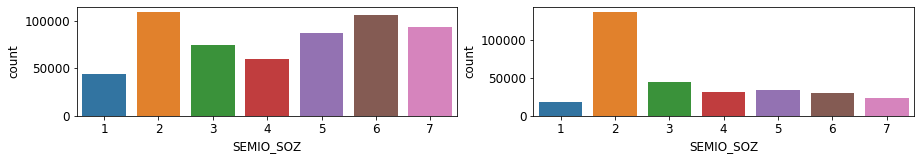

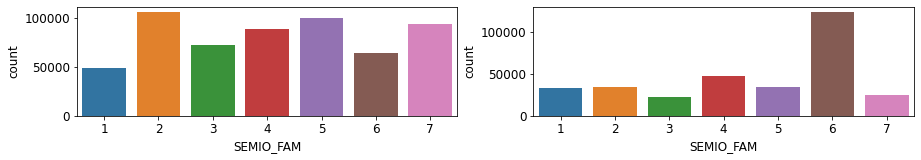

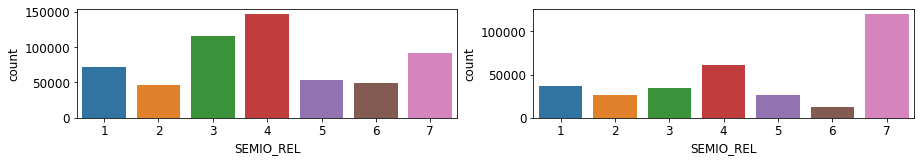

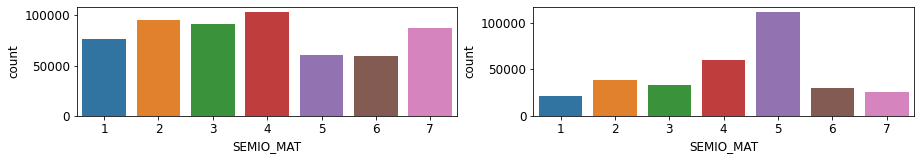

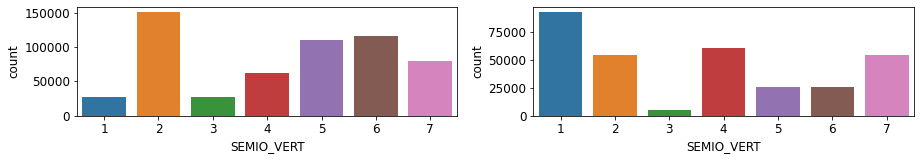

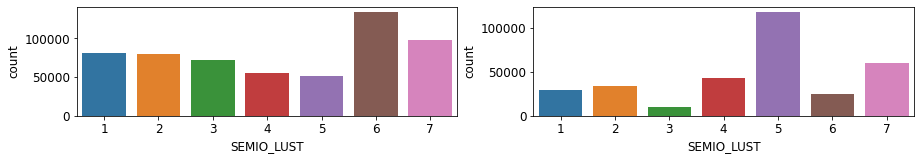

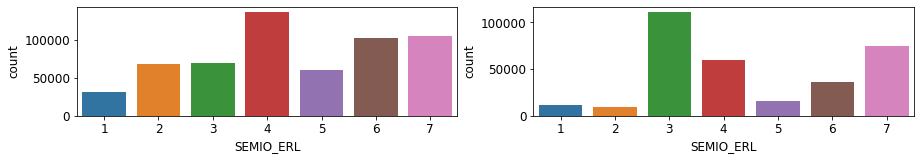

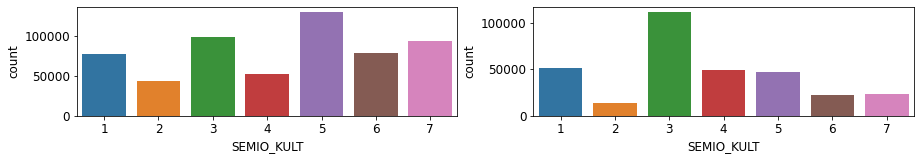

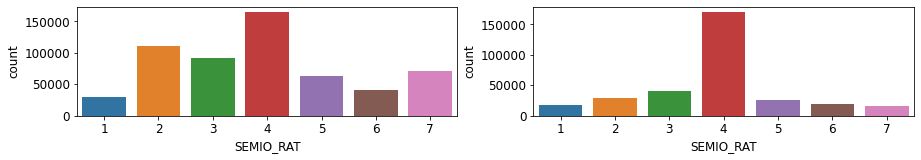

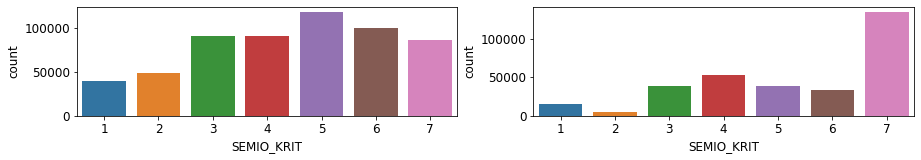

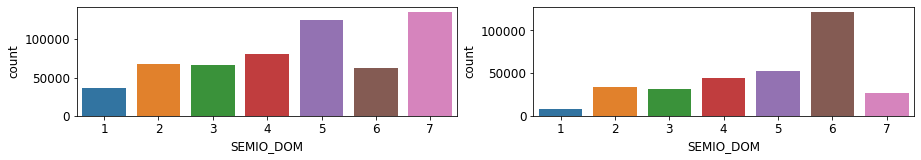

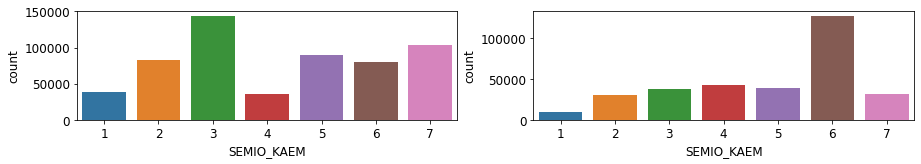

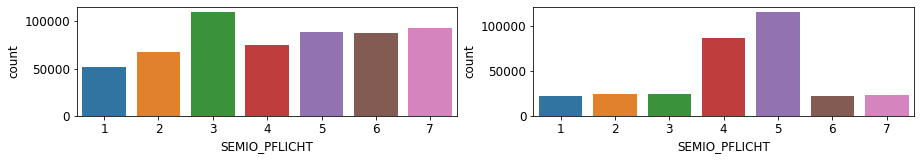

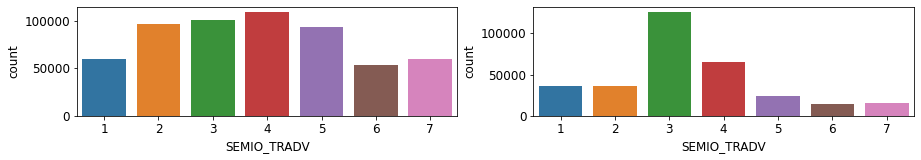

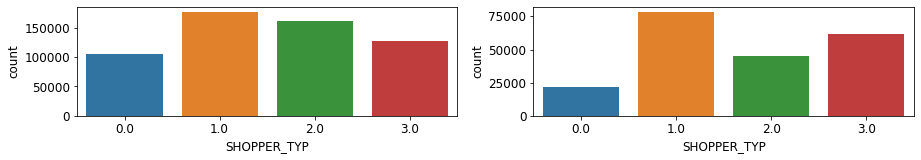

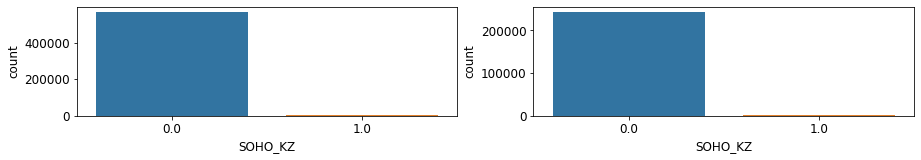

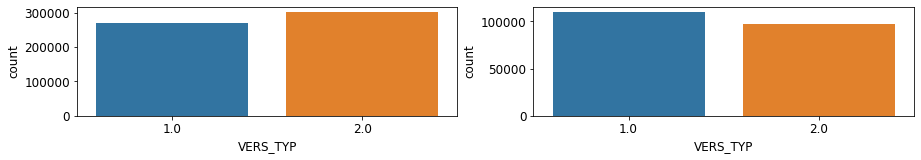

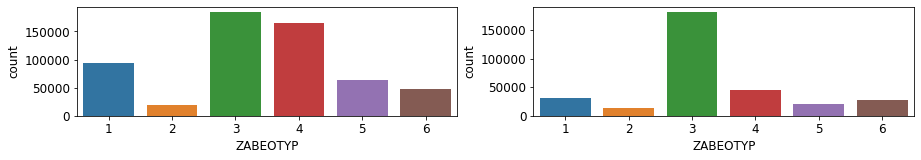

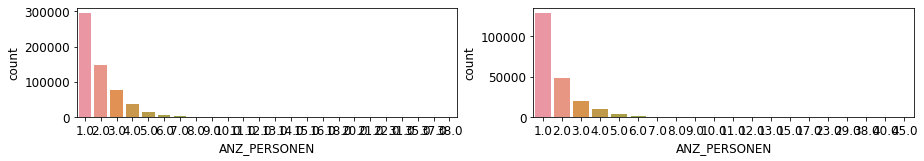

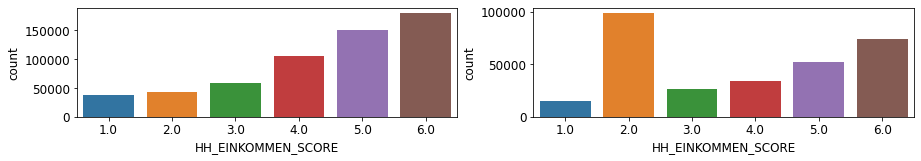

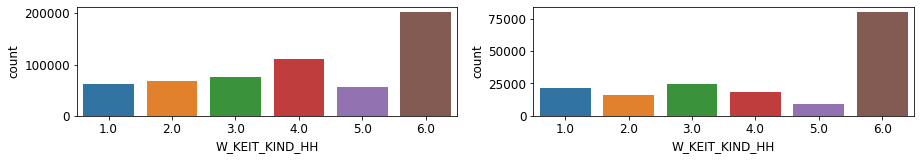

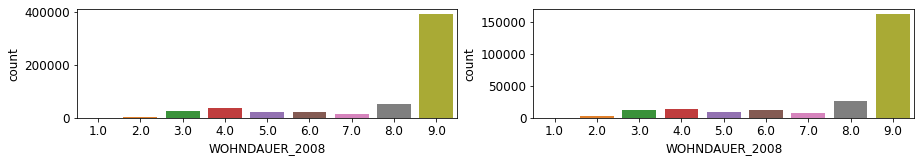

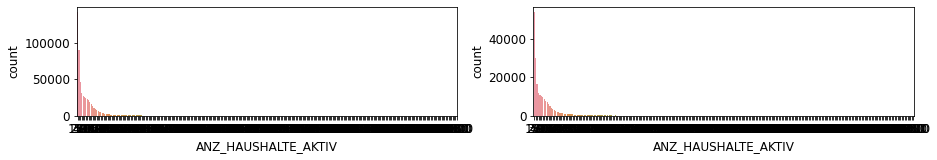

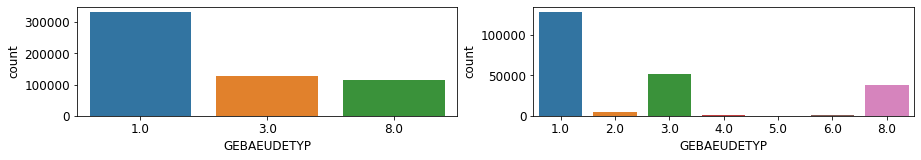

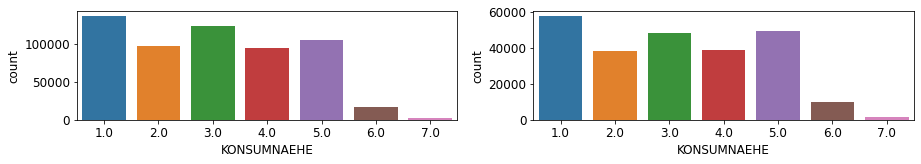

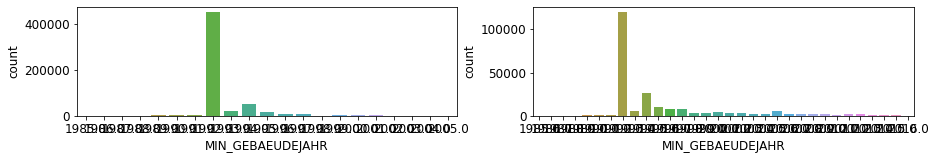

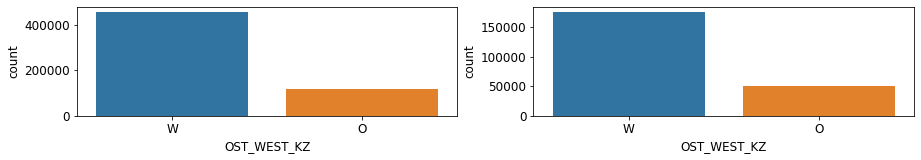

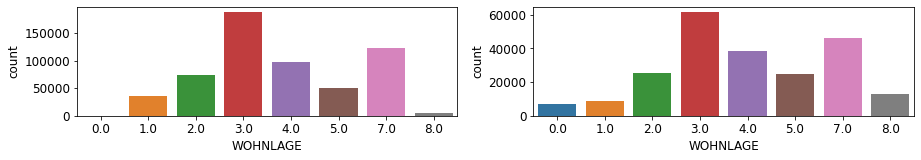

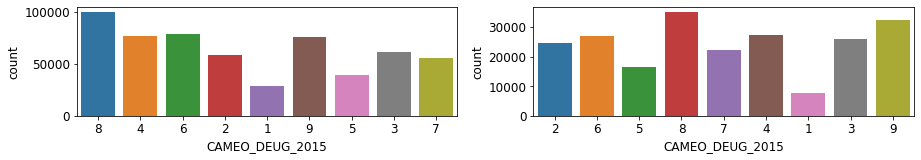

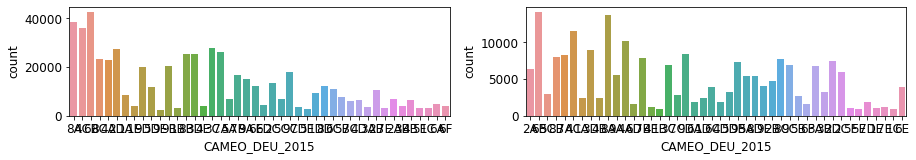

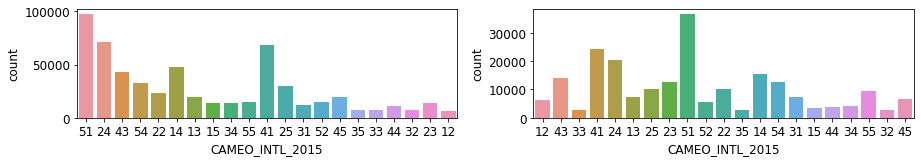

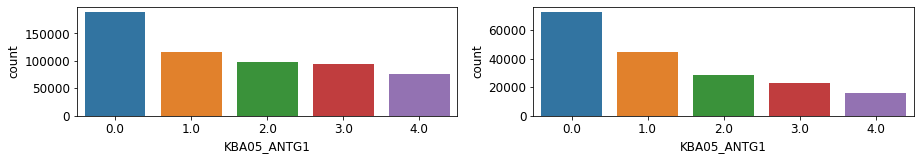

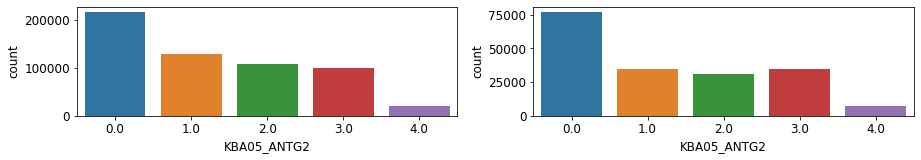

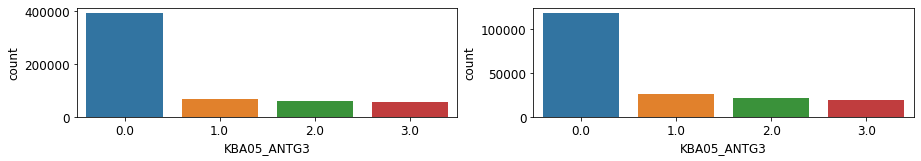

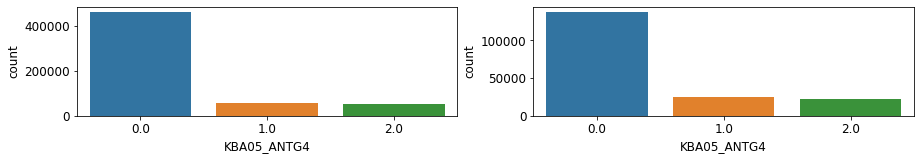

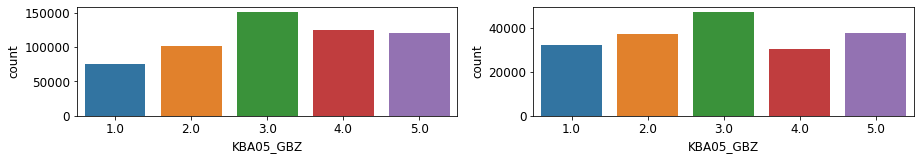

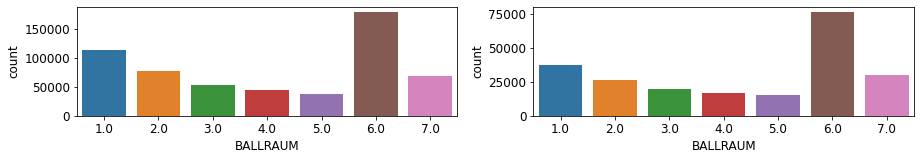

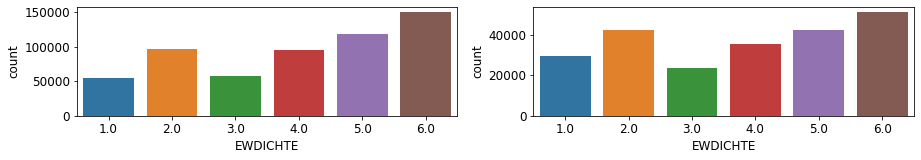

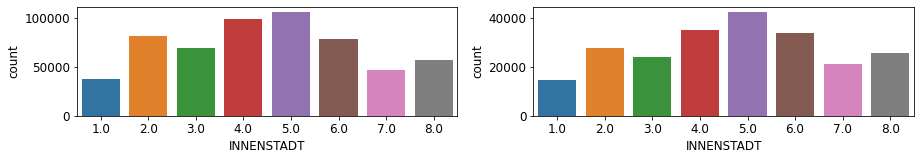

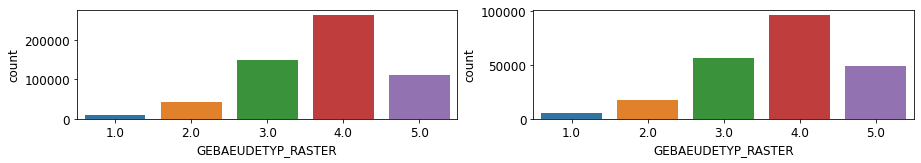

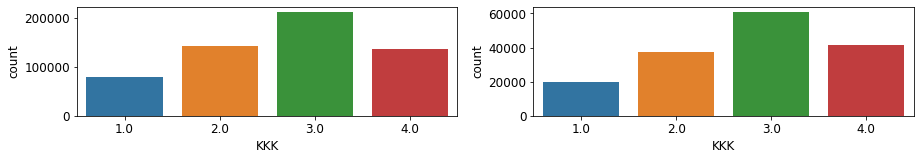

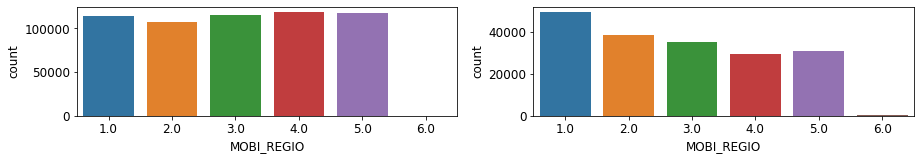

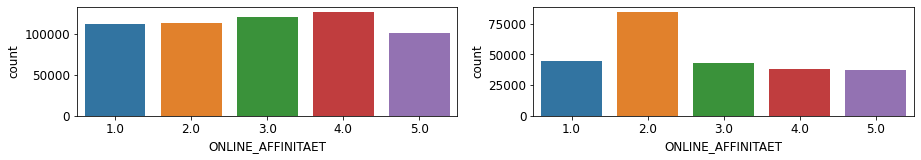

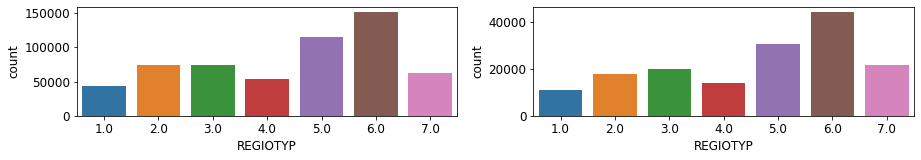

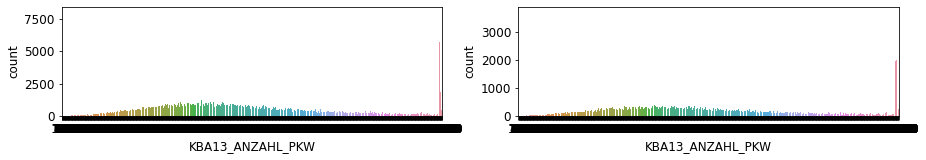

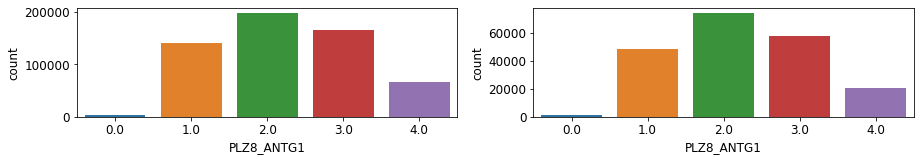

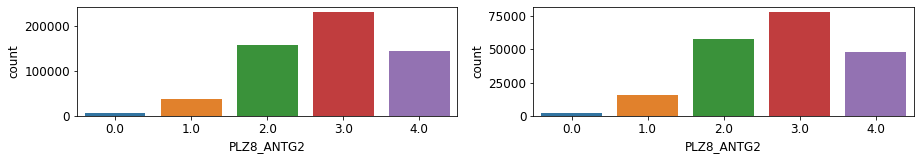

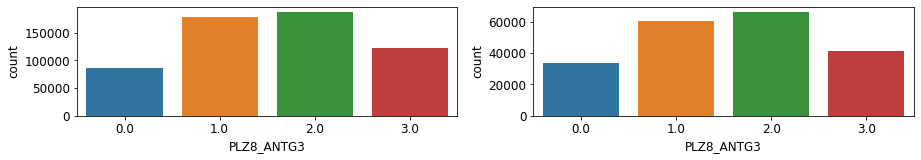

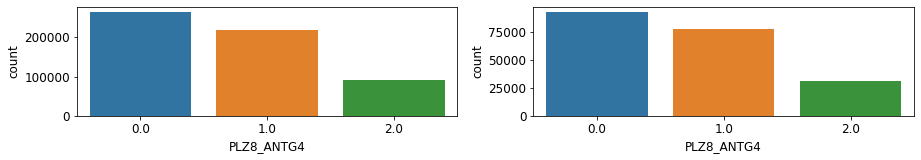

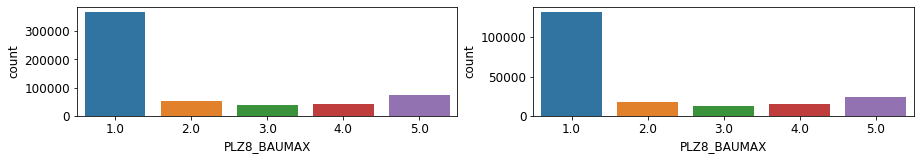

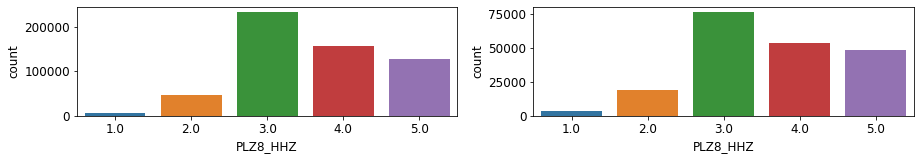

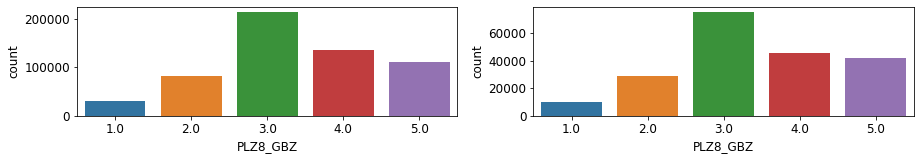

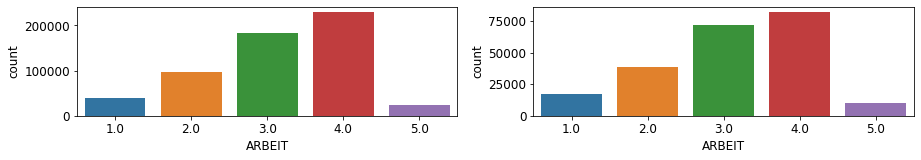

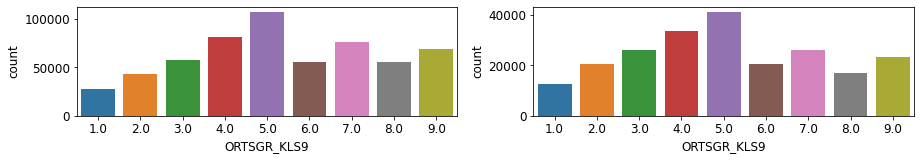

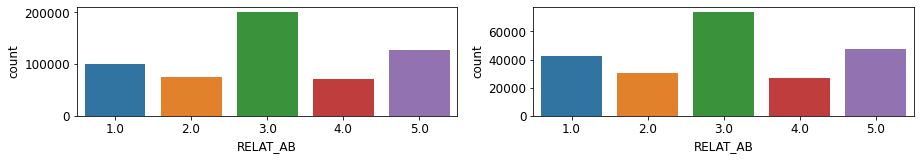

In [25]:
plt.rcParams["figure.figsize"] = (15,2)
plt.rcParams["font.size"]      = 12
    
col_names = azdias_wo_nan.columns

for i, col_name in enumerate(col_names):
    fig = plt.figure()
    #
    ax1 = fig.add_subplot(1, 2, 1)
    sns.countplot(x=azdias_wo_nan[col_name])
    if i==0:
        ax1.set_title("azdias without Nan")
    #
    ax2 = fig.add_subplot(1, 2, 2)
    sns.countplot(x=azdias_w_nan[col_name])
    if i==0:
        ax2.set_title("azdias with Nan")    

<a id="mokuji_2_4"></a>
### [2-4. Discussions about Data Types](#mokuji_0)

Before proceeding to the encoding step, I show data types in the dataset.<br>
I show unique values for each type in the cell below.<br>
From the results of below cell, I can see 5 data types.
 1. `numeric`  ---> The size of value has meanings. So, I can use this without modification.
 2. `ordinal`  ---> The size of value has meanings. So, I can use this without modification.
 3. `interval` ---> The size of value has meanings. So, I can use this without modification.
 4. `categorical`  ---> The size of value has **no meanings**. So I need to modify this.
    - For `categorical` data, I will apply one-hot encoding.
 5. `mixed`  ---> The size of value has **no meanings**. So I need to modify this.
    - For `mixed` data, I will explain how to treat them later.

In [26]:
def display_unique_variables(df, data_type):
    feature_names_all = feat_info[feat_info.type == data_type]["attribute"].values
    feat_names_in_df  = df.columns
    #
    print("=====================")
    print("Type = ", data_type)
    print("=====================")
    #
    for tmp_name in feature_names_all:
        if (tmp_name in feat_names_in_df):
            unique_values = df[tmp_name].unique()
            print("column = ", tmp_name)
            print("       ", unique_values)
    #
    print("\n")

In [27]:
for data_type in ["numeric", "ordinal", "interval", "categorical", "mixed"]:
    display_unique_variables(azdias_wo_nan, data_type)

Type =  numeric
column =  ANZ_PERSONEN
        [ 2.  1.  4.  3.  5.  6.  8.  7. 12.  9. 21. 10. 13. 11. 14. 20. 31. 37.
 16. 22. 15. 18. 35. 38.]
column =  ANZ_HAUSHALTE_AKTIV
        [ 11.  10.   3.   5.   4.   6.   2.   9.   1.  14.   8.  44.  25. 272.
  13.  33.  12.  15.  22.  21.   7.  20.  23.  18.  24.  31.  39.  16.
  19.  30.  29.  17.  88.  49.  60.  35.  45.  28.  26.  77.  27.  47.
  50.  36.  43.  54.  41.  40.  37.  53.  57.  38. 118.  32.  78.  42.
  70.  46.  73. 137.  59.  80.  92. 126.  71.  68.  81.  52.  69.  66.
  76.  34.  95.  48.  63. 124.  90. 128.  67.  56.  83. 102.  58. 259.
  51. 160. 134. 169. 246.  82. 114. 183.  86.  61. 143.  64.  99. 216.
 125. 112. 123.  55. 141.  62.  72.  85.  87. 223.  93. 179.  98. 135.
 149.  97. 101.  75. 109. 121. 236. 103. 367. 195.  89.  94. 107. 119.
 161. 157. 175.  91. 136.  65. 116. 120.  84.  79. 104. 177. 316. 127.
 155. 133. 178. 176. 110. 131. 122. 258. 111. 256. 117. 211. 199. 140.
 200. 108. 106. 285. 180. 163. 377.

Careful observation of `mixed` revealed the following:
- **PRAEGENDE_JUGENDJAHRE** combines information on two dimensions:
  1. generation by decade
    - e.g. = 40s, 50s, 60s, 70s, 80s, 90s
  2. movement
    - e.g. = Mainstream, Avantgarde
    
- I will create two new variables to capture the other two dimensions.
  1. **PRAEGENDE_JUGENDJAHRE_GEN** = continuous numerical data
  2. **PRAEGENDE_JUGENDJAHRE_MOV** = binary numerical data
  
---
- **CAMEO_INTL_2015** combines information on two dimensions:
  1. wealth : first digit shows wealth level
  2. lifestage : second digit shows lifestage level
    
- I will create two new variables to capture the other two dimensions.
  1. **CAMEO_INTL_2015_WEALTH** = continuous numerical data from 1 to 5
  2. **CAMEO_INTL_2015_LIFESTAGE** = continuous numerical data from 1 to 5
  
---
- Other features in `mixed`
  - I apply one-hot encoding

<a id="mokuji_2_5"></a>
### [2-5. Encoding](#mokuji_0)

In the cell above, I investigated data distribution of `azdias` and applied three function to `azdias`.
  1. `conv_miss_to_nan(feat_info, azdias)` : This converts `missing_or_unknown` to `nan`.
  2. `remove_cols_with_nan(azdias, thresh_percentage=20.0)` : This removes columns which have nans over threshold.
  3. `remove_rows_with_nan(azdias, thresh_percentage=0.0)` : This removes rows which have nans over threshold.


In this section, I will apply some encoding processes to data with the policy which was explained in the cells above.

#### Encoding policy for `categorical`
- features which have more than 3 types of value --> `one-hot encoding`
- I will create a function `edencode_categorical(azdias)`.
 
    
#### Encoding policy for `mixed`
- I explained in the previous cell.
- I will create a function `encode_mix(azdias)`.

<a id="mokuji_2_5_1"></a>
### [2-5-1. Encoding : `categorical`](#mokuji_0)

In [28]:
def get_features_multi_category(feat_info, df):
    features_categorical    = feat_info[feat_info["type"] == "categorical"].attribute
    features_multi_category = []
    #
    for feature in features_categorical:
        if feature in df.columns:
            if df[feature].nunique() > 2:
                features_multi_category.append(feature)
    #
    return features_multi_category
#-----------------------------------------------#
def encode_categorical(feat_info, df):
    # get feature names to encode
    features_multi_category = get_features_multi_category(feat_info, df)

    # One-hot encoding
    df = pd.get_dummies(df, columns=features_multi_category)
    
    # Exceptional Treatment
    df["OST_WEST_KZ"] = df["OST_WEST_KZ"].replace("O", 0.0)
    df["OST_WEST_KZ"] = df["OST_WEST_KZ"].replace("W", 1.0)
    
    return df

#-----------------------------------------------#
azdias_wo_nan = encode_categorical(feat_info, azdias_wo_nan)

display(azdias_wo_nan.head(10))

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,LP_FAMILIE_GROB_1.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,LP_STATUS_FEIN_4.0,LP_STATUS_FEIN_5.0,LP_STATUS_FEIN_6.0,LP_STATUS_FEIN_7.0,LP_STATUS_FEIN_8.0,LP_STATUS_FEIN_9.0,LP_STATUS_FEIN_10.0,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,GEBAEUDETYP_1.0,GEBAEUDETYP_3.0,GEBAEUDETYP_8.0,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,CAMEO_DEU_2015_1A,CAMEO_DEU_2015_1B,CAMEO_DEU_2015_1C,CAMEO_DEU_2015_1D,CAMEO_DEU_2015_1E,CAMEO_DEU_2015_2A,CAMEO_DEU_2015_2B,CAMEO_DEU_2015_2C,CAMEO_DEU_2015_2D,CAMEO_DEU_2015_3A,CAMEO_DEU_2015_3B,CAMEO_DEU_2015_3C,CAMEO_DEU_2015_3D,CAMEO_DEU_2015_4A,CAMEO_DEU_2015_4B,CAMEO_DEU_2015_4C,CAMEO_DEU_2015_4D,CAMEO_DEU_2015_4E,CAMEO_DEU_2015_5A,CAMEO_DEU_2015_5B,CAMEO_DEU_2015_5C,CAMEO_DEU_2015_5D,CAMEO_DEU_2015_5E,CAMEO_DEU_2015_5F,CAMEO_DEU_2015_6A,CAMEO_DEU_2015_6B,CAMEO_DEU_2015_6C,CAMEO_DEU_2015_6D,CAMEO_DEU_2015_6E,CAMEO_DEU_2015_6F,CAMEO_DEU_2015_7A,CAMEO_DEU_2015_7B,CAMEO_DEU_2015_7C,CAMEO_DEU_2015_7D,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
1,1.0,2,1,5,2,5,4,5,3.0,21.0,6.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1.0,2.0,2.0,6.0,3.0,9.0,11.0,1.0,1992.0,1.0,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3.0,2,1,4,1,2,3,5,3.0,3.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0.0,1.0,1.0,4.0,3.0,9.0,10.0,5.0,1992.0,1.0,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.0,1,4,3,4,1,3,2,3.0,32.0,10.0,8

<a id="mokuji_2_5_2"></a>
### [2-5-2. Encoding : `mixed`](#mokuji_0)

In [29]:
#features_mixed_all = list(feat_info[feat_info["type"] == "mixed"].attribute)
#features_special   = ["PRAEGENDE_JUGENDJAHRE", "CAMEO_INTL_2015"]
#features_mixed_other = set(features_mixed_all) ^ set(features_special)

#display(features_mixed_all)
#display(features_mixed_other)

### The encoding function : PRAEGENDE_JUGENDJAHRE

In [30]:
# PRAEGENDE_JUGENDJAHRE-1
def encode_generations(input_value):
    encode_map    = {}
    encode_map[0] = [1,2]   # 40s
    encode_map[1] = [3,4]   # 50s
    encode_map[2] = [5,6,7] # 60s
    encode_map[3] = [8,9]   # 70s
    encode_map[4] = [10,11,12,13] # 80s
    encode_map[5] = [14,15] # 90s
    #
    try:
        for new_value, old_values in encode_map.items():
            if input_value in old_values:
                return new_value
    # When input value is Nan
    except ValueError:
        return np.nan
#-----------------------------------------------#
# PRAEGENDE_JUGENDJAHRE-2
def encode_movement(input_value):
    value_of_mainstrem = [1, 3, 5, 8, 10, 12, 14]
    #
    try:
        if input_value in value_of_mainstrem:
            return 1
        else:
            return 0
    # When input value is Nan
    except ValueError:
        return np.nan
    

### The encoding function : CAMEO_INTL_2015

In [31]:
#-----------------------------------------------#
# CAMEO_INTL_2015-1
def encode_wealth(input_value):
    if pd.isnull(input_value):
        return np.nan
    else:
        # First digit
        return int(str(input_value)[0])
    
#-----------------------------------------------#
# CAMEO_INTL_2015-2
def encode_lifestage(input_value):
    if pd.isnull(input_value):
        return np.nan
    else:
        # Second digit
        return int(str(input_value)[1])    

### The encoding function : Mixed Others

In [32]:
from Library.my_common_tool import list_intersection
#-----------------------------------------------#
# Mixed Others
def one_hot_encode_mixed(df, feat_info):
    features_mixed_all = list(feat_info[feat_info["type"] == "mixed"].attribute)
    features_special   = ["PRAEGENDE_JUGENDJAHRE", "CAMEO_INTL_2015"]
    features_mixed_other = set(features_mixed_all) ^ set(features_special)
    features_current     = df.columns
    features_target      = list_intersection(features_current, features_mixed_other)
    
    df = pd.get_dummies(df, columns=features_target)
    return df 

### The encoding function : For Mixed All

In [33]:
#-----------------------------------------------#
def encode_mixed(df, feat_info):
    # Mixed-1 : "PRAEGENDE_JUGENDJAHRE" 
    if "PRAEGENDE_JUGENDJAHRE" in df.columns:
        df["PRAEGENDE_JUGENDJAHRE_GEN"] = df["PRAEGENDE_JUGENDJAHRE"].apply(encode_generations)
        df["PRAEGENDE_JUGENDJAHRE_MOV"] = df["PRAEGENDE_JUGENDJAHRE"].apply(encode_movement)
        df = df.drop(["PRAEGENDE_JUGENDJAHRE"], axis=1)
    
    # Mixed-2 : "CAMEO_INTL_2015"
    if "CAMEO_INTL_2015" in df.columns:
        df["CAMEO_INTL_2015_WEAL"] = df["CAMEO_INTL_2015"].apply(encode_wealth)
        df["CAMEO_INTL_2015_LIFE"] = df["CAMEO_INTL_2015"].apply(encode_lifestage)
        df = df.drop(["CAMEO_INTL_2015"], axis=1)    
        
    # Mixed Others
    df = one_hot_encode_mixed(df, feat_info)
        
    return df
#-----------------------------------------------#

In [34]:
azdias_wo_nan = encode_mixed(azdias_wo_nan, feat_info)
azdias_wo_nan[["PRAEGENDE_JUGENDJAHRE_GEN", "PRAEGENDE_JUGENDJAHRE_MOV", "CAMEO_INTL_2015_WEAL", "CAMEO_INTL_2015_LIFE"] ]

,PRAEGENDE_JUGENDJAHRE_GEN,PRAEGENDE_JUGENDJAHRE_MOV,CAMEO_INTL_2015_WEAL,CAMEO_INTL_2015_LIFE
1,5,1,5,1
2,5,0,2,4
4,3,1,4,3
5,1,1,5,4
6,4,1,2,2
...,...,...,...,...
891210,3,1,4,1
891213,4,0,3,4
891214,5,1,2,3
891215,4,1,3,1


<a id="mokuji_2_6"></a>
### [2-6. Scaling](#mokuji_0)

Before I apply dimensionality reduction techniques to the data, I need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. 

In [35]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaler_out = std_scaler.fit_transform(azdias_wo_nan)
azdias_scaled = pd.DataFrame(scaler_out)
azdias_scaled.columns = azdias_wo_nan.columns
azdias_scaled.describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,LP_FAMILIE_FEIN_1.0,LP_FAMILIE_FEIN_2.0,LP_FAMILIE_FEIN_3.0,LP_FAMILIE_FEIN_4.0,LP_FAMILIE_FEIN_5.0,LP_FAMILIE_FEIN_6.0,LP_FAMILIE_FEIN_7.0,LP_FAMILIE_FEIN_8.0,LP_FAMILIE_FEIN_9.0,LP_FAMILIE_FEIN_10.0,LP_FAMILIE_FEIN_11.0,LP_FAMILIE_GROB_1.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_FEIN_1.0,LP_STATUS_FEIN_2.0,LP_STATUS_FEIN_3.0,...,CAMEO_DEU_2015_4A,CAMEO_DEU_2015_4B,CAMEO_DEU_2015_4C,CAMEO_DEU_2015_4D,CAMEO_DEU_2015_4E,CAMEO_DEU_2015_5A,CAMEO_DEU_2015_5B,CAMEO_DEU_2015_5C,CAMEO_DEU_2015_5D,CAMEO_DEU_2015_5E,CAMEO_DEU_2015_5F,CAMEO_DEU_2015_6A,CAMEO_DEU_2015_6B,CAMEO_DEU_2015_6C,CAMEO_DEU_2015_6D,CAMEO_DEU_2015_6E,CAMEO_DEU_2015_6F,CAMEO_DEU_2015_7A,CAMEO_DEU_2015_7B,CAMEO_DEU_2015_7C,CAMEO_DEU_2015_7D,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_GEN,PRAEGENDE_JUGENDJAHRE_MOV,CAMEO_INTL_2015_WEAL,CAMEO_INTL_2015_LIFE,WOHNLAGE_0.0,WOHNLAGE_1.0,WOHNLAGE_2.0,WOHNLAGE_3.0,WOHNLAGE_4.0,WOHNLAGE_5.0,WOHNLAGE_7.0,WOHNLAGE_8.0,PLZ8_BAUMAX_1.0,PLZ8_BAUMAX_2.0,PLZ8_BAUMAX_3.0,PLZ8_BAUMAX_4.0,PLZ8_BAUMAX_5.0,LP_LEBENSPHASE_FEIN_1.0,LP_LEBENSPHASE_FEIN_2.0,LP_LEBENSPHASE_FEIN_3.0,LP_LEBENSPHASE_FEIN_4.0,LP_LEBENSPHASE_FEIN_5.0,LP_LEBENSPHASE_FEIN_6.0,LP_LEBENSPHASE_FEIN_7.0,LP_LEBENSPHASE_FEIN_8.0,LP_LEBENSPHASE_FEIN_9.0,LP_LEBENSPHASE_FEIN_10.0,LP_LEBENSPHASE_FEIN_11.0,LP_LEBENSPHASE_FEIN_12.0,LP_LEBENSPHASE_FEIN_13.0,LP_LEBENSPHASE_FEIN_14.0,LP_LEBENSPHASE_FEIN_15.0,LP_LEBENSPHASE_FEIN_16.0,LP_LEBENSPHASE_FEIN_17.0,LP_LEBENSPHASE_FEIN_18.0,LP_LEBENSPHASE_FEIN_19.0,LP_LEBENSPHASE_FEIN_20.0,LP_LEBENSPHASE_FEIN_21.0,LP_LEBENSPHASE_FEIN_22.0,LP_LEBENSPHASE_FEIN_23.0,LP_LEBENSPHASE_FEIN_24.0,LP_LEBENSPHASE_FEIN_25.0,LP_LEBENSPHASE_FEIN_26.0,LP_LEBENSPHASE_FEIN_27.0,LP_LEBENSPHASE_FEIN_28.0,LP_LEBENSPHASE_FEIN_29.0,LP_LEBENSPHASE_FEIN_30.0,LP_LEBENSPHASE_FEIN_31.0,LP_LEBENSPHASE_FEIN_32.0,LP_LEBENSPHASE_FEIN_33.0,LP_LEBENSPHASE_FEIN_34.0,LP_LEBENSPHASE_FEIN_35.0,LP_LEBENSPHASE_FEIN_36.0,LP_LEBENSPHASE_FEIN_37.0,LP_LEBENSPHASE_FEIN_38.0,LP_LEBENSPHASE_FEIN_39.0,LP_LEBENSPHASE_FEIN_40.0,LP_LEBENSPHASE_GROB_1.0,LP_LEBENSPHASE_GROB_2.0,LP_LEBENSPHASE_GROB_3.0,LP_LEBENSPHASE_GROB_4.0,LP_LEBENSPHASE_GROB_5.0,LP_LEBENSPHASE_GROB_6.0,LP_LEBENSPHASE_GROB_7.0,LP_LEBENSPHASE_GROB_8.0,LP_LEBENSPHASE_GROB_9.0,LP_LEBENSPHASE_GROB_10.0,LP_LEBENSPHASE_GROB_11.0,LP_LEBENSPHASE_GROB_12.0
count,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05,5.732340e+05

### There are some outliers.
- In the cell below, after scaling, there are some outliers.
- So, I will drop those columns.

(0.0, 100.0)

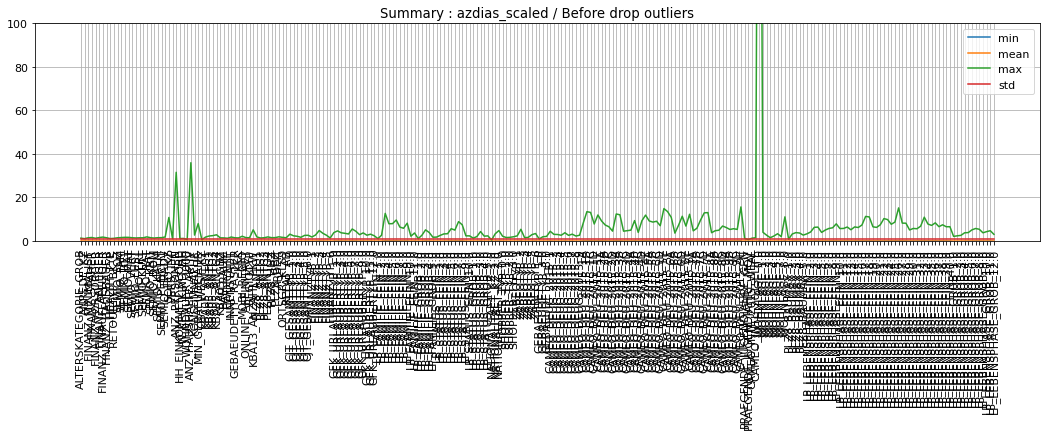

In [36]:
title = "Summary : azdias_scaled / Before drop outliers"
fig = plot_summary(azdias_scaled, title,figsize=(18,4),fontsize=11)
plt.figure(fig)
plt.ylim((0,100))

In [37]:
tmp_summary   = azdias_scaled.describe()
tmp_ser_max   = tmp_summary.loc["max"]
outlier_names = list(tmp_ser_max[tmp_ser_max>20].index)
display(outlier_names)

['ANZ_PERSONEN', 'ANZ_HAUSHALTE_AKTIV', 'WOHNLAGE_0.0']

In [38]:
azdias_scaled.drop(columns=outlier_names, inplace=True)

### After dropping the outliers, I can see that there is no outliers from the cell below.

(0.0, 20.0)

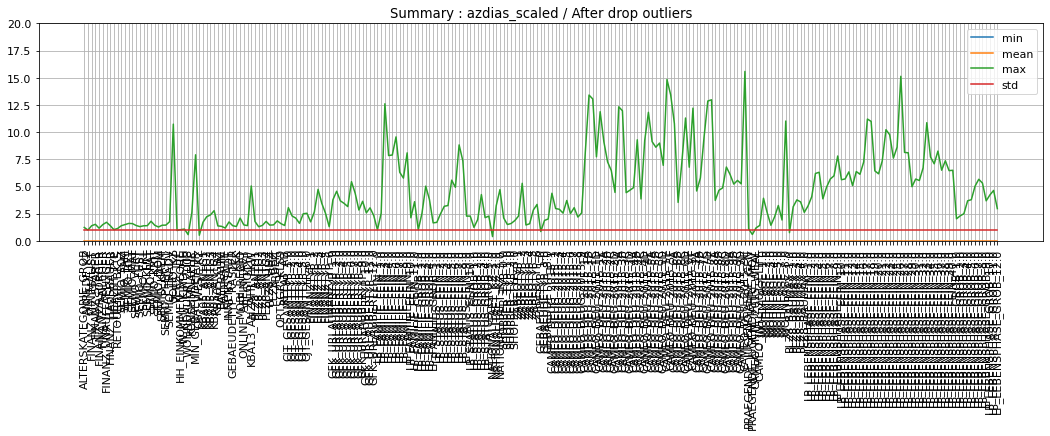

In [39]:
title = "Summary : azdias_scaled / After drop outliers"
fig = plot_summary(azdias_scaled, title,figsize=(18,4),fontsize=11)
plt.figure(fig)
plt.ylim((0,20))

### The data size is too large.

In [40]:
azdias_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573234 entries, 0 to 573233
Columns: 247 entries, ALTERSKATEGORIE_GROB to LP_LEBENSPHASE_GROB_12.0
dtypes: float64(247)
memory usage: 1.1 GB


<a id="mokuji_3"></a>
## [3. Dimensionality Reduction](#mokuji_0)

The size of `scaled data` is very large, so I will apply dimensionality reduction techniques.

1. I will use sklearn's [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply **Principal Component Anaysis** on the data.
    - This finds the vectors of maximal variance in the data. <br>
    - At first, I do not set any parameters or set a number of components that is at least half the number of features.    
2. I will check out the variance explained by each principal component as well as the cumulative variance explained.
    - I will plot the cumulative or sequential values.
    - Based on what I find from the plot, I will select a value for the number of transformed features you'll retain for the clustering part of the project.
3. Once I have made a choise for the number of components to keep,
    - I will re-fit a PCA instance to perform the decided-on transformation.

<a id="mokuji_3_1"></a>
### [3-1. PCA, First Trial](#mokuji_0)

In this section, I create two functions, and perform `PCA`.
1. `my_pca` : This function performs PCA.
2. `plot_pca_results` : This function displays cumulative and sequential values.

In [41]:
# Import libraries for PCA
from sklearn.decomposition import PCA
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
def my_pca(data, n_components=0):
    if n_components == 0:
        model_pca = PCA()
    else:
        model_pca = PCA(n_components)
    #
    data_reductioned = model_pca.fit_transform(data)
    return model_pca, data_reductioned

In [68]:
def plot_pca_results(model_pca, annotation_interval=10, fig_size=(16,5), font_size=14):
    # get pca object info
    val_components = model_pca.explained_variance_ratio_
    val_cum_sum    = np.cumsum(val_components) # Total to accumulate sequentially
    num_components = len(val_components)
    
    # Plot
    x_value = list(range(num_components))
    #
    plt.rcParams["font.size"]      = font_size
    plt.rcParams["figure.figsize"] = fig_size
    #
    plt.bar( x_value, val_components*100);
    plt.plot(x_value, val_cum_sum*100, 'ro-');
    plt.grid();
    plt.xlabel("Principal Components")
    plt.ylabel("Variance Explained [%]")
    plt.xticks(np.arange(0, num_components, annotation_interval))
    plt.title("Explained Variance Per Principal Component")
    
    # Annotation
    flag_upper = 1
    for i in range(num_components):
        #
        if i%annotation_interval == 0:
            tmp_str1 = "{0:.2f}".format(val_components[i] * 100)
            tmp_str2 = "{0:.0f}".format(val_cum_sum[i] * 100)
            #
            tmp_x   = x_value[i] + 0.2
            #
            tmp_y2  = val_cum_sum[i] * 100
            #
            if flag_upper == 1:
                tmp_y1 = val_components[0] * 100
                flag_upper = 0
            else:
                tmp_y1 = val_components[0] * 100 / 2
                flag_upper = 1
            #
            plt.annotate(tmp_str1, (tmp_x, tmp_y1), va="bottom", ha="center", fontsize=font_size )
            
            if i != 0: # prevent overlapping of annotation
                plt.annotate(tmp_str2, (tmp_x, tmp_y2), va="bottom", ha="center", fontsize=font_size )

### Perform PCA

In [47]:
n_components = 0
model_pca, data_reductioned = my_pca(azdias_scaled, n_components)

### Plot PCA results

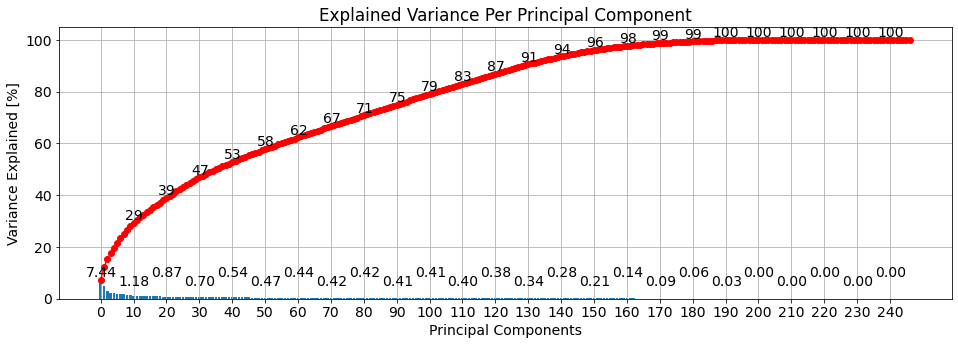

In [69]:
plot_pca_results(model_pca)

<a id="mokuji_3_2"></a>
### [3-2. Check Out the PCA Results](#mokuji_0)

- From the plot above, if I use the 1/3 of data(= 80 components), I can have about 70% of the data information.
- So, for 1st trial, I will use 80 components for the dimensionality reduction.